## NLP Data Exploration

In [1]:
import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import acquire
import prepare

In [2]:
# features for viz
plt.rc('figure', figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)

# plt.rcParams['font.family'] = ['sans-serif']
# plt.rcParams['font.sans-serif']=['SimHei'] 

### Exercises
- Spam Data
- 1st iteration = uses the data 'as is'

1a. Load the spam data set.

In [3]:
df = pd.read_csv('./spam_clean.csv')

In [4]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# create lists of ham_words, spam_words, and all_words
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [6]:
# convert the lists to number counts of each word
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
# create a new dataframe with the converted info
df = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
df.columns = ['ham', 'spam', 'all']
df.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


### 1b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

#### Spam Bigrams

In [8]:
def plot_bigrams(series):
    '''
    This function will take in a pandas Series, and return a side-by-side plot of:
    - horizontal barchart
    - wordcloud
    '''
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    pd.Series(nltk.bigrams(series.split())).value_counts().head(10).plot.barh()
    plt.title('Top 10 most common spam bigrams')
    plt.subplot(1,2,2)
    img = WordCloud(background_color='white', width=800, height=600).generate(series)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

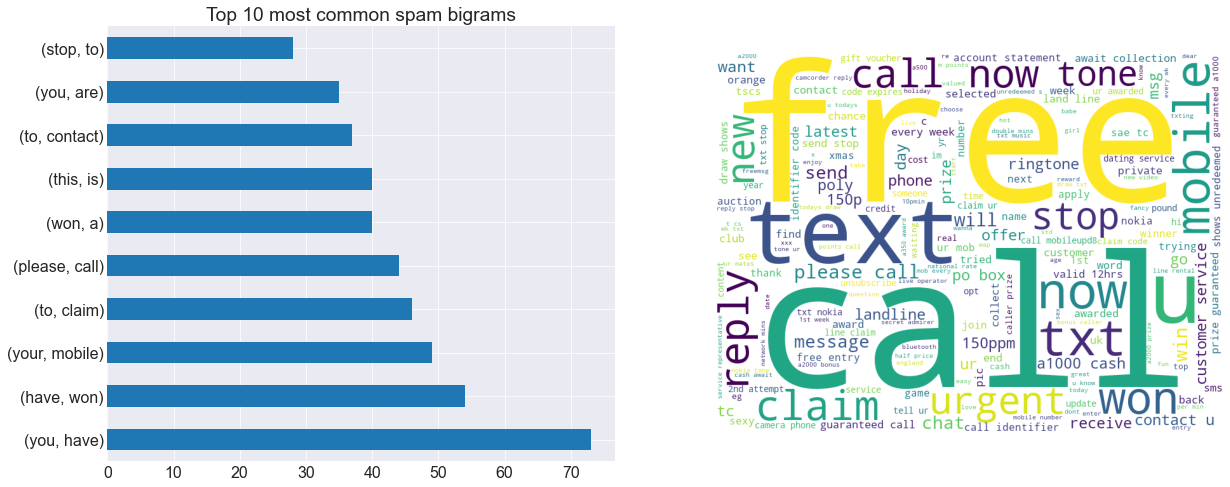

In [9]:
plot_bigrams(spam_words)

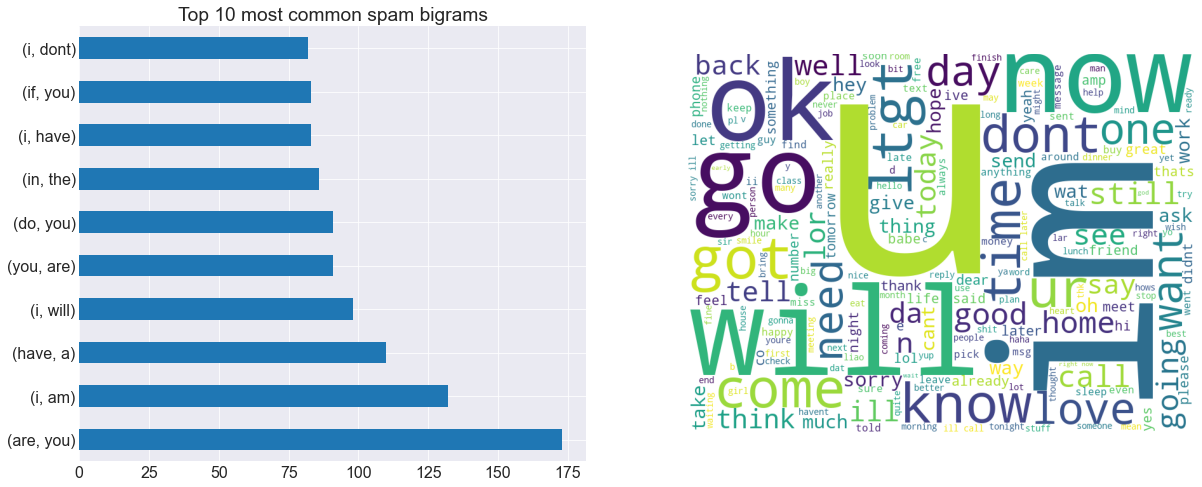

In [10]:
plot_bigrams(ham_words)

In [11]:
def comp_ngrams(series1, series2, n=2):
    '''
    This function will take in two pandas series, and return a subplot of side-by-side:
    - horizontal bar charts
    - wordclouds
    '''
    
    plt.figure(figsize=(20,16))
    plt.subplot(2,2,1)
    pd.Series(nltk.ngrams(series1.split(), n=n)).value_counts().head(10).plot.barh()
    plt.title(f'Top 10 most common spam ngrams where n={n}')
    plt.subplot(2,2,2)
    pd.Series(nltk.ngrams(series2.split(), n=n)).value_counts().head(10).plot.barh()
    plt.title(f'Top 10 most common ham ngrams where n={n}')
    plt.subplot(2,2,3)
    img = WordCloud(background_color='white', width=800, height=600).generate(series1)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(2,2,4)
    img = WordCloud(background_color='white', width=800, height=600).generate(series2)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

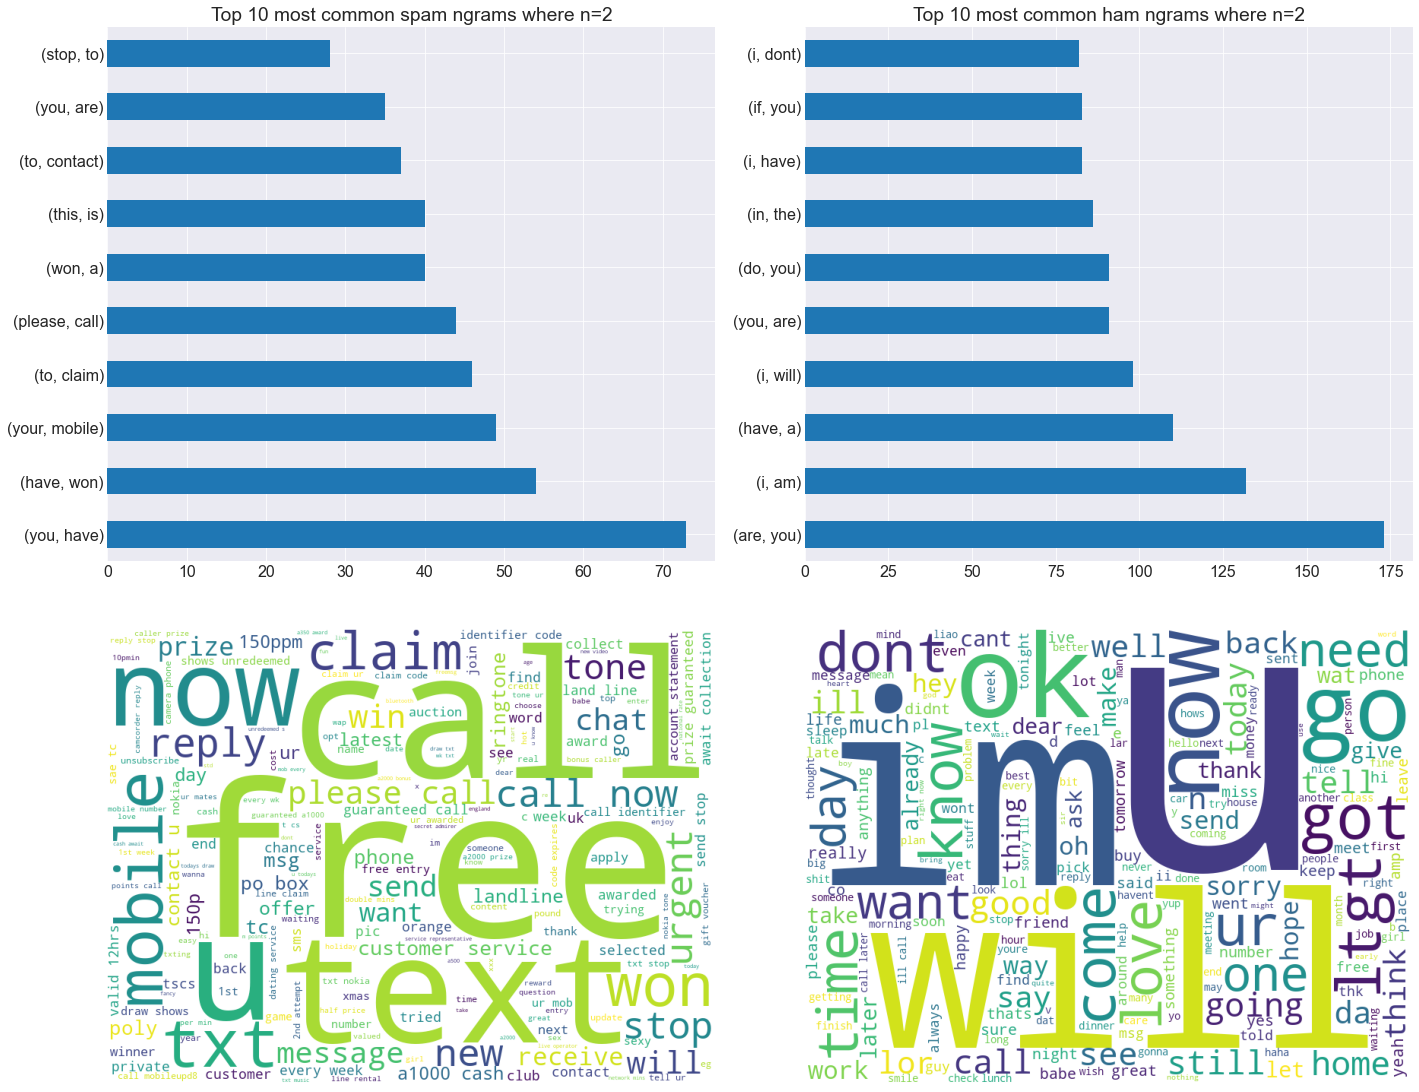

In [12]:
comp_ngrams(spam_words, ham_words)

1c. Is there any overlap in the bigrams for the spam data and the ham data?

- (you, are)
    - The only over lap in the top 10

1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

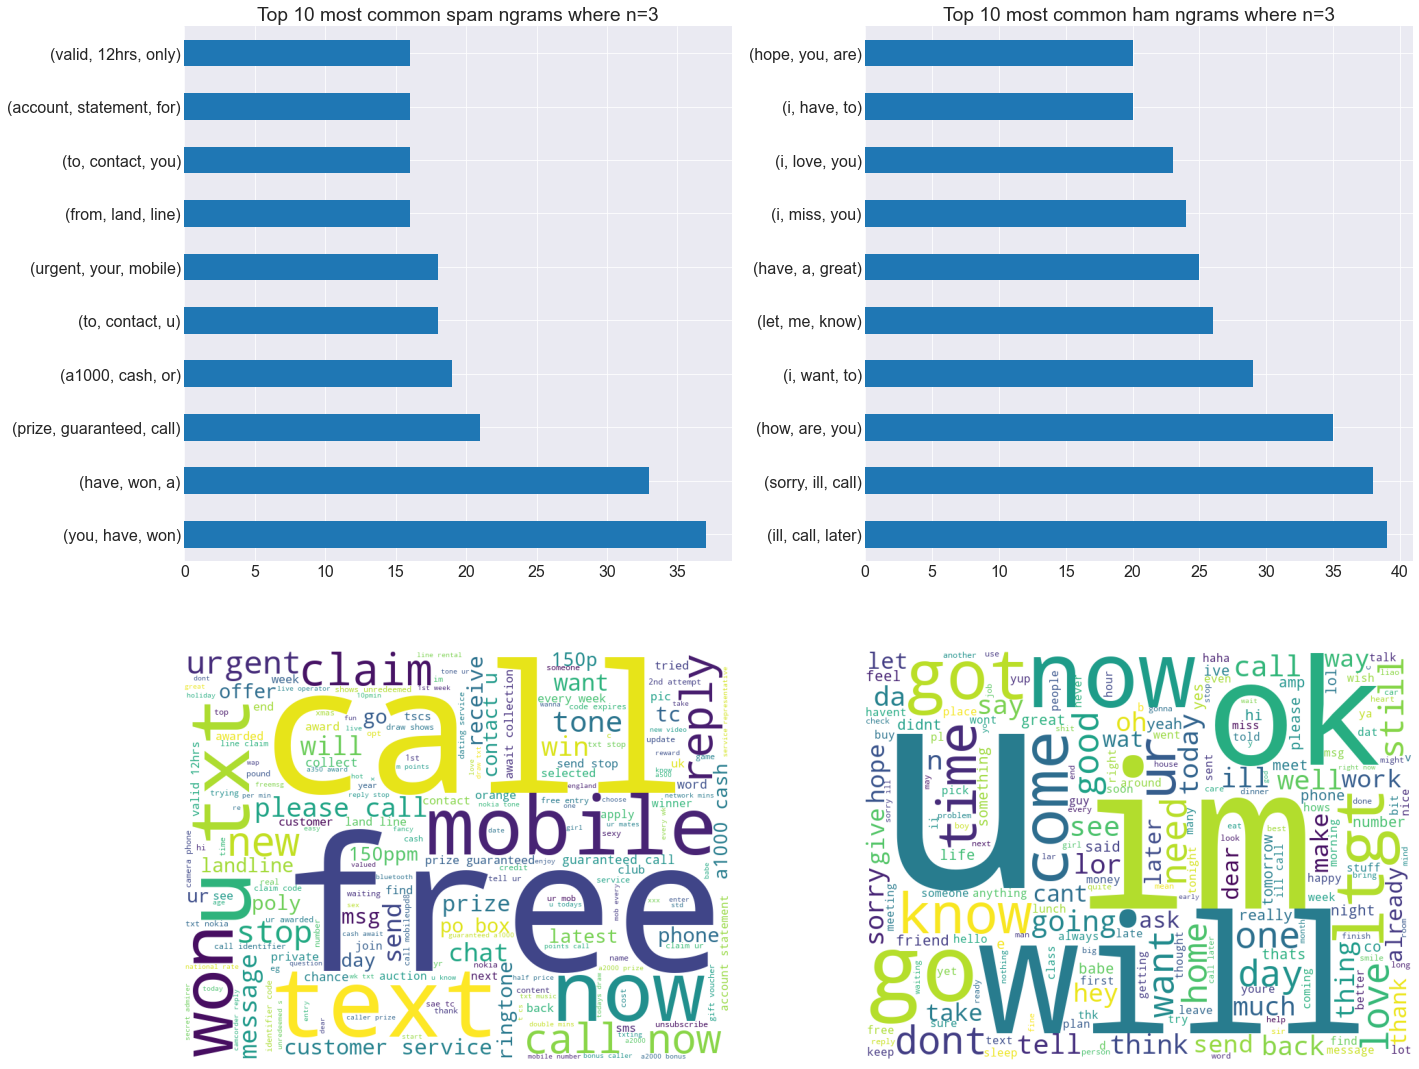

In [13]:
comp_ngrams(spam_words, ham_words, n=3)

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [14]:
# url_list needed to pull in the bolg data
url_list = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/', 
           'https://codeup.com/data-science-myths/',
           'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
           'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
           'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/']

In [15]:
# let's acquire the blog dataframe
blog_df = acquire.get_blog_articles(url_list)

In [16]:
# now let's prep the data before exploration
blog_df = prepare.prep_article_data(blog_df, 'content', extra_words=[], exclude_words=[])

In [17]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               5 non-null      object
 1   content             5 non-null      object
 2   cleaned_content     5 non-null      object
 3   stemmed_content     5 non-null      object
 4   lemmatized_content  5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


In [18]:
# turn each variable column into a Series
content = blog_df['content'].astype(str)
cleaned_content = blog_df['cleaned_content'].astype(str)
stemmed_content = pd.Series(blog_df['stemmed_content'])
lemmatized_content = pd.Series(blog_df['lemmatized_content'])

In [19]:
content.astype(str)

0    The rumors are true! The time has arrived. Cod...
1    By Dimitri Antoniou and Maggie Giust\nData Sci...
2    By Dimitri Antoniou\nA week ago, Codeup launch...
3    SA Tech Job Fair\nThe third bi-annual San Anto...
4    Competitor Bootcamps Are Closing. Is the Model...
Name: content, dtype: object

In [20]:
type(spam_words)

str

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

### Valedictorian Villanueva

In [21]:
content = clean(' '.join(blog_df.content))
cleaned_content = clean(' '.join(blog_df['cleaned_content']))
stemmed_content = clean(' '.join(blog_df['stemmed_content']))
lemmatized_content = clean(' '.join(blog_df['lemmatized_content']))

In [29]:
def ngrams_bar_wordcloud (text_list, title_list, n=2):
    '''
    
    '''
    
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

In [30]:
text_list = [content, cleaned_content, stemmed_content, lemmatized_content]
title_list = ['content', 'cleaned_content', 'stemmed_content', 'lemmatized_content']

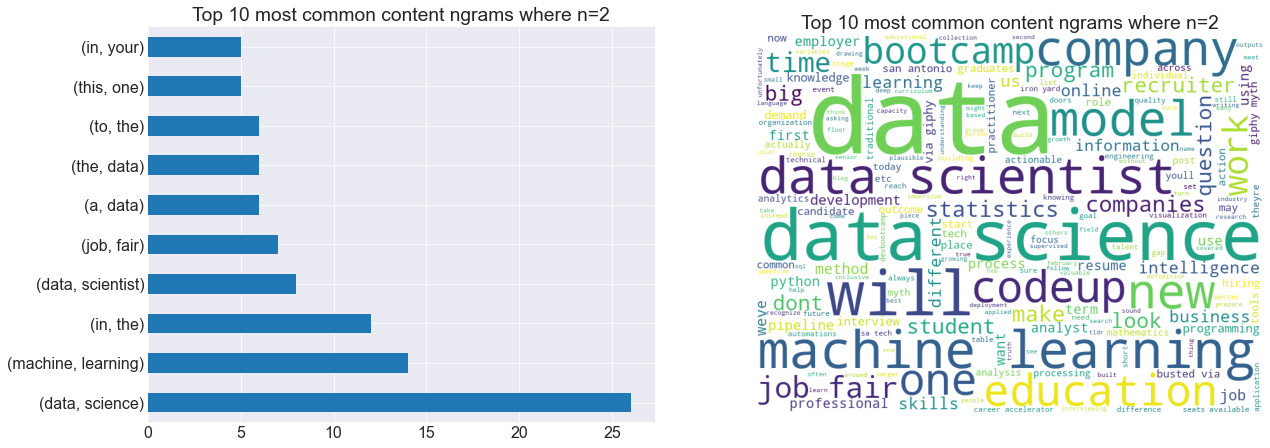

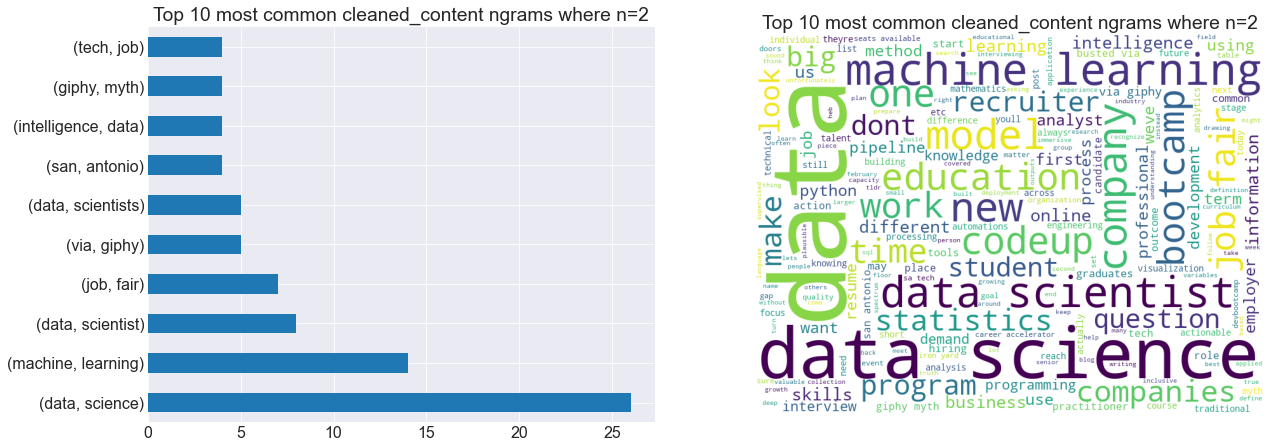

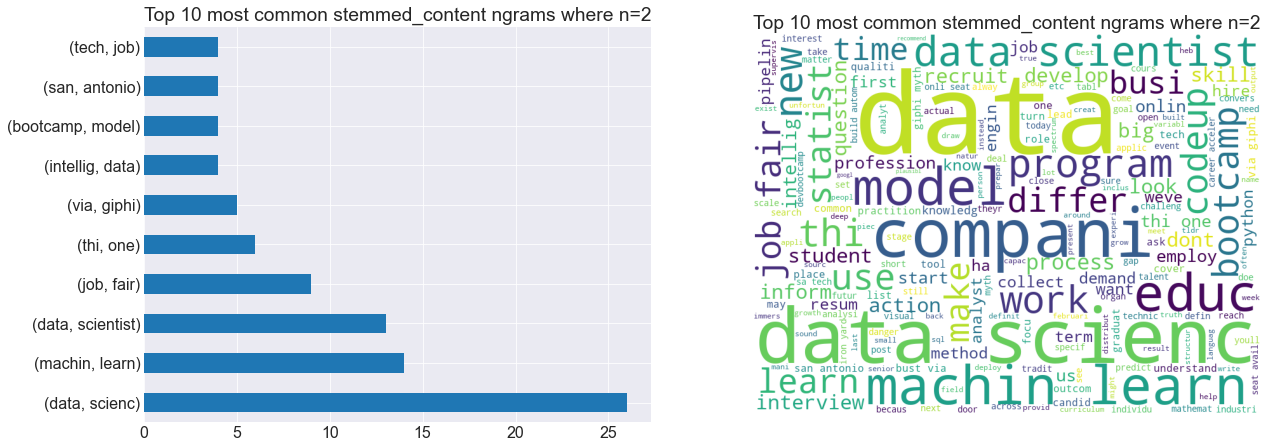

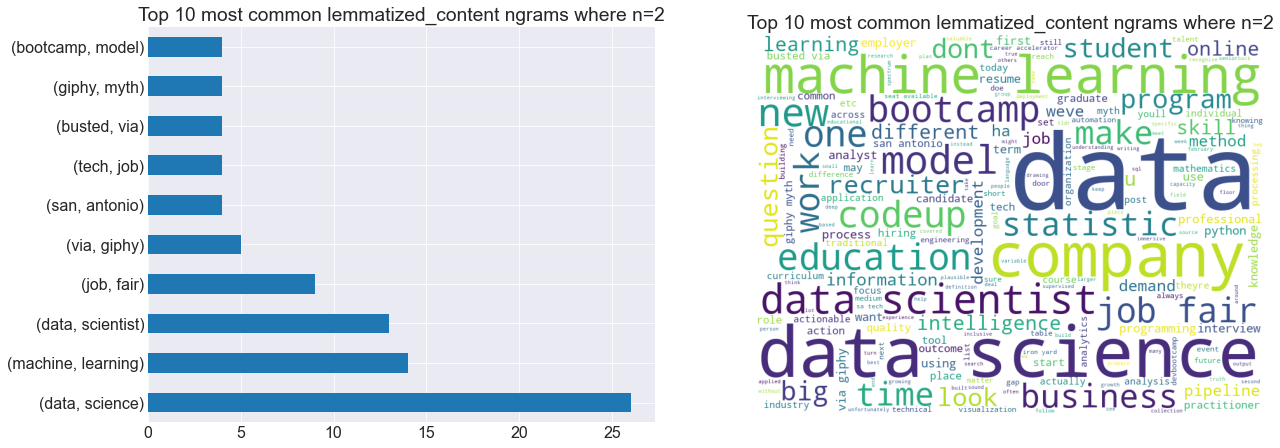

In [31]:
ngrams_bar_wordcloud(text_list, title_list)

In [ ]:
# Ravinder's Rescue...
# This code works to make 
plt.rc('font', size=12)
#create fig and subplot
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
# data series
s_ham = word_counts.sort_values('ham', ascending=False).head(20)['ham']
s_spam = word_counts.sort_values('ham', ascending=False).head(20)['spam']
# create the charts
axes[1].barh(s_ham.index, s_ham.values)
axes[0].barh(s_spam.index, s_spam.values, color = 'orange')
#invert the first axis
axes[0].invert_xaxis()
axes[0].set_xlim(2500, 0)
axes[1].set_xlim(0, 2500)
# set titles
axes[0].set_title('Spam count')
axes[1].set_title('Ham count')
plt.subplots_adjust(wspace=0)
plt.suptitle('Ham vs Spam count for the top 20 most frequent words', y = 1.06)